# Análisis de cómo las posiciones políticas y percepciones económicas influyen en el bienestar social en Europa.

Definición del Problema: el bienestar social es un indicador clave para evaluar la calidad de vida. Sin embargo, factores como las posiciones políticas y la percepción de los problemas sociales pueden jugar un papel importante en cómo las personas perciben su bienestar. Este proyecto busca responder:

### ¿Cómo se relaciona la percepción de la inmigración con el bienestar social en España, y cómo se ve afectada esta relación por las posiciones políticas y las preocupaciones económicas?

Obtención de Datos
Dataset: Encuesta Social Europea 2023 (European Social Survey 2023)

Variables clave:

- Bienestar social (satisfacción con la vida, felicidad, percepción de bienestar general).
- Posiciones políticas (escala de izquierda a derecha, confianza en instituciones políticas).
- Preocupaciones económicas (ingresos, clase social percibida, percepción de desigualdad).
- Factores sociodemográficos (edad, género, educación, país de residencia).

Problemas claros en el análisis de bienestar (Hipótesis) Usaremos a España para ver la correlación:

- Inmigración masiva

Se desarrollará una hipótesis basandonos en España para probar la efectividad de los data sets

# Importación de datos

In [23]:
import zipfile
import os

# Descarga del archivo zip
zip_path = '/workspace/machine-learning-python-template/data/raw/ESS11.zip'
extract_path = '/workspace/machine-learning-python-template/data/interim'

# Crear directorios
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listado de contenidos
os.listdir(extract_path)


['.gitkeep', 'ESS11 codebook.html', 'ESS11.csv', 'summary_statistics.csv']

In [24]:
import pandas as pd
import zipfile
import os

# Indicar los paths
zip_path = '/workspace/machine-learning-python-template/data/raw/ESS11.zip'
extract_path = '/workspace/machine-learning-python-template/data/interim'

#  Extraer el ZIP file
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# cargar estructura csv
csv_path = os.path.join(extract_path, 'ESS11.csv')
ess_data_sample = pd.read_csv(csv_path, nrows=10)  

# desplegar
ess_data_sample


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,rinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,ESS11e02,11,2.0,20.11.2024,50014,AT,1.185115,0.392891,0.330915,0.130013,...,NaN,2023-11-12 15:26:55,2023-11-12 15:21:28,2023-11-12 15:26:55,30,1,2,0.000579,107,317
1,ESS11e02,11,2.0,20.11.2024,50030,AT,0.609898,0.325153,0.330915,0.107598,...,NaN,2023-10-18 10:44:18,2023-10-18 10:42:22,2023-10-18 10:44:18,40,1,1,0.001124,69,128
2,ESS11e02,11,2.0,20.11.2024,50057,AT,1.392330,4.000023,0.330915,1.323666,...,NaN,2023-09-30 14:13:33,2023-09-30 14:08:31,2023-09-30 14:13:33,42,1,2,0.000493,18,418
3,ESS11e02,11,2.0,20.11.2024,50106,AT,0.556061,0.176228,0.330915,0.058316,...,NaN,2023-06-30 15:11:21,2023-06-30 15:08:05,2023-06-30 15:11:21,34,1,1,0.001233,101,295
4,ESS11e02,11,2.0,20.11.2024,50145,AT,0.722795,1.060940,0.330915,0.351080,...,NaN,2023-07-11 11:14:03,2023-07-11 11:10:02,2023-07-11 11:14:03,57,1,2,0.000949,115,344
5,ESS11e02,11,2.0,20.11.2024,50158,AT,0.992605,1.392813,0.330915,0.460902,...,NaN,2023-10-16 09:42:52,2023-10-16 09:38:14,2023-10-16 09:42:52,57,1,2,0.000691,7,373
6,ESS11e02,11,2.0,20.11.2024,50211,AT,0.540318,0.577186,0.330915,0.190999,...,NaN,2023-10-20 18:46:40,2023-10-20 18:44:11,2023-10-20 18:46:40,25,1,2,0.001269,58,86
7,ESS11e02,11,2.0,20.11.2024,50212,AT,0.814622,0.619486,0.330915,0.204997,...,NaN,2023-10-26 16:29:37,2023-10-26 16:19:59,2023-10-26 16:29:37,68,1,2,0.000842,38,3
8,ESS11e02,11,2.0,20.11.2024,50213,AT,1.364956,0.693635,0.330915,0.229534,...,NaN,2023-09-09 15:59:13,2023-09-09 15:57:18,2023-09-09 15:59:13,40,1,2,0.000502,62,108
9,ESS11e02,11,2.0,20.11.2024,50235,AT,0.872949,0.492267,0.330915,0.162898,...,NaN,2023-10-08 12:00:13,2023-10-08 11:57:05,2023-10-08 12:00:13,36,1,2,0.000786,105,314


In [25]:
# Ver el contenido
codebook_path = os.path.join(extract_path, 'ESS11 codebook.html')

# Preview del HTML
with open(codebook_path, 'r', encoding='utf-8') as file:
    codebook_content = file.read()

# Mostrar una porción del contenido
codebook_content[:1000]

'<!DOCTYPE html>\n<html>\n\n<head>\n    <meta charset="UTF-8">\n\n    <style>\n        html {\n            max-width: 70ch;\n            /* larger spacing on larger screens, very small spacing on tiny screens */\n            padding: calc(1vmin + .5rem);\n            /* shorthand for margin-left/margin-right */\n            margin-inline: auto;\n            /* fluid sizing: https://frontaid.io/blog/fluid-typography-2d-css-locks-clamp/ */\n            font-size: clamp(1em, 0.909em + 0.45vmin, 1.25em);\n            /* use system font stack: https://developer.mozilla.org/en-US/docs/Web/CSS/font-family */\n            font-family: system-ui;\n            --font-size-x-small: 0.8rem;\n            --font-size-small: 1rem;\n            --font-size-medium: 1.3rem;\n            --font-size-large: 1.65rem;\n            --font-size-x-large: 2.4rem;\n            --space-xx-small: 0.25rem;\n            --space-x-small: 0.5rem;\n            --space-small: 1rem;\n            --space-medium: 1.5rem;\n

# Visualización relativa de datos

In [26]:
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Ejemplo de csv
csv_path = os.path.join(extract_path, 'ESS11.csv')
variables_of_interest = ['nwspol', 'polintr', 'psppipla', 'cptppola']

ess_data_sample = pd.read_csv(csv_path, usecols=variables_of_interest, nrows=100)

# Mostrar
ess_data_sample.head()

,nwspol,polintr,psppipla,cptppola
0,90,1,4,5
1,90,2,3,2
2,30,2,4,3
3,15,3,2,3
4,60,2,4,3


Distribución de variables. En un principio usaremos los datos generales de EUROPA

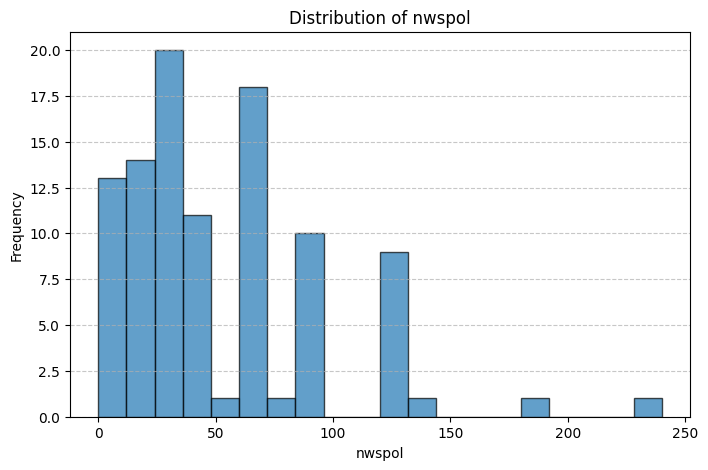

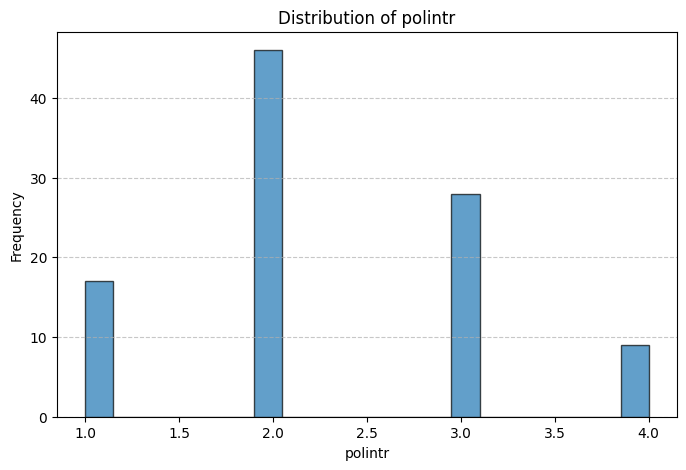

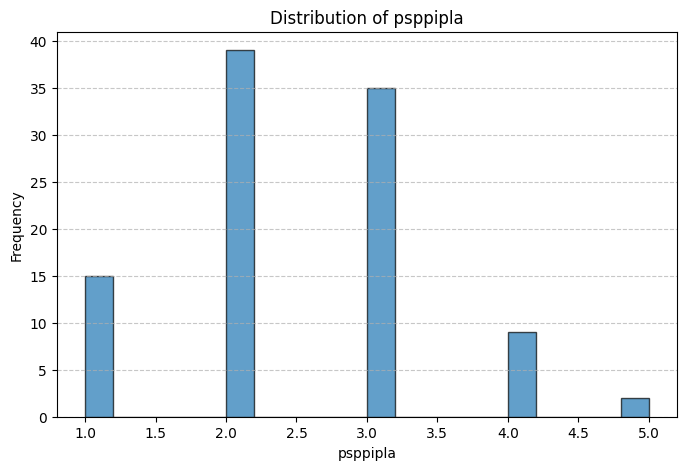

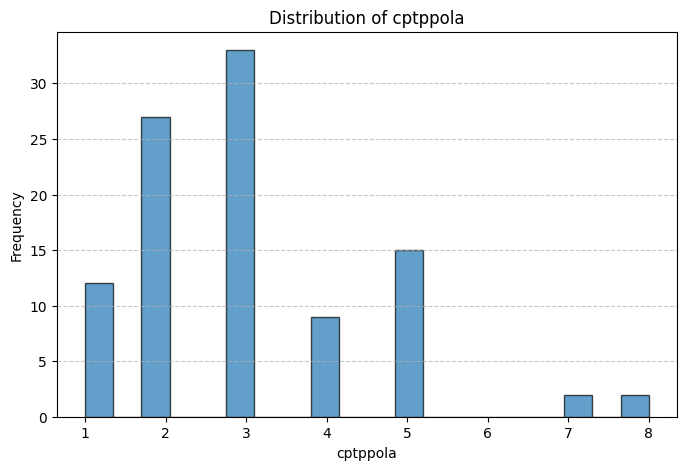

(nwspol      0
 polintr     0
 psppipla    0
 cptppola    0
 dtype: int64,
            nwspol    polintr    psppipla    cptppola
 count  100.000000  100.00000  100.000000  100.000000
 mean    51.330000    2.29000    2.440000    3.060000
 std     41.933342    0.85629    0.924635    1.509699
 min      0.000000    1.00000    1.000000    1.000000
 25%     20.000000    2.00000    2.000000    2.000000
 50%     45.000000    2.00000    2.000000    3.000000
 75%     60.000000    3.00000    3.000000    4.000000
 max    240.000000    4.00000    5.000000    8.000000)

In [27]:
import matplotlib.pyplot as plt

# Ver variables perdidas
missing_values = ess_data_sample.isnull().sum()
data_description = ess_data_sample.describe()

# Visualizar distribución
for column in ess_data_sample.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(ess_data_sample[column].dropna(), bins=20, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

missing_values, data_description


## Distribuciones:
- nwspol: Tiene una distribución sesgada a la derecha, con algunos individuos dedicando hasta 240 minutos diarios a noticias políticas.
- polintr: La mayoría de las personas tienen un interés moderado en política (valores 2 y 3).
- psppipla: La percepción de influencia política está mayormente centrada en valores bajos (2-3).
- cptppola: La confianza en la participación política es variable, pero la mayoría se concentra entre 2 y 4, con un posible valor atípico (8).

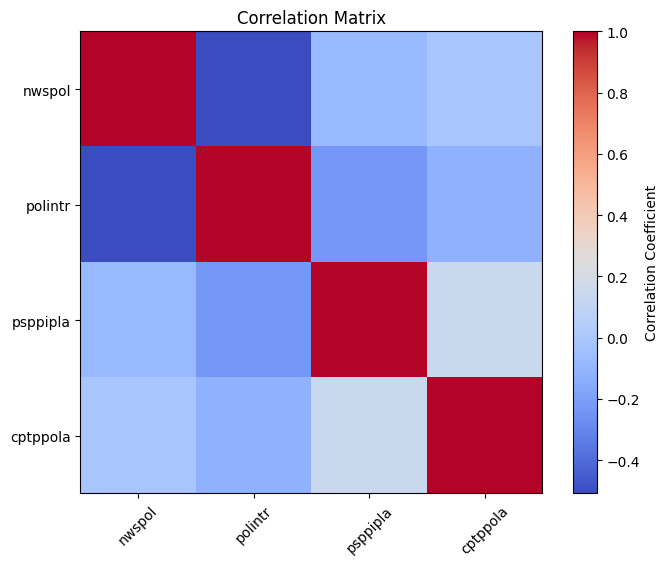

,nwspol,polintr,psppipla,cptppola
nwspol,1.000000,-0.508487,-0.082459,-0.010624
polintr,-0.508487,1.000000,-0.226577,-0.114268
psppipla,-0.082459,-0.226577,1.000000,0.145978
cptppola,-0.010624,-0.114268,0.145978,1.000000


In [28]:
# Limpiar outlier 
ess_data_sample['cptppola'] = ess_data_sample['cptppola'].replace(8, None)

# Ver correlaciones
correlation_matrix = ess_data_sample.corr()

# Mostrar heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix


## El análisis de la matriz de correlación muestra lo siguiente:

nwspol (Tiempo en noticias políticas):

- Correlación negativa moderada con polintr (-0.51): Las personas con menor interés en la política tienden a dedicar más tiempo a las noticias políticas.
- Correlación muy débil con psppipla (-0.08): El tiempo dedicado a noticias políticas tiene poca relación con la percepción de influencia en la política.

polintr (Interés en política):

- Correlación negativa moderada con nwspol (-0.51): Ver explicación anterior.
- Correlación débil negativa con psppipla (-0.23): Las personas menos interesadas en la política tienden a percibir menos influencia del sistema político

psppipla (Percepción del sistema político):

Correlaciones débiles con las otras variables, lo que sugiere que esta percepción no está directamente relacionada con el tiempo en noticias o el interés político.


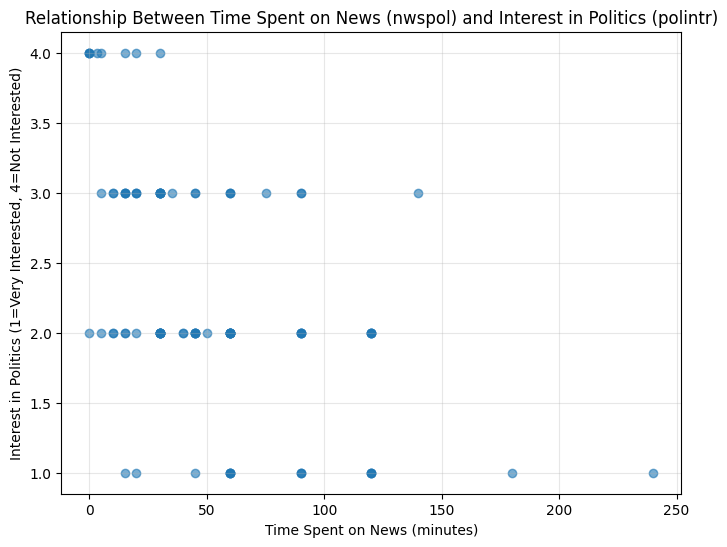

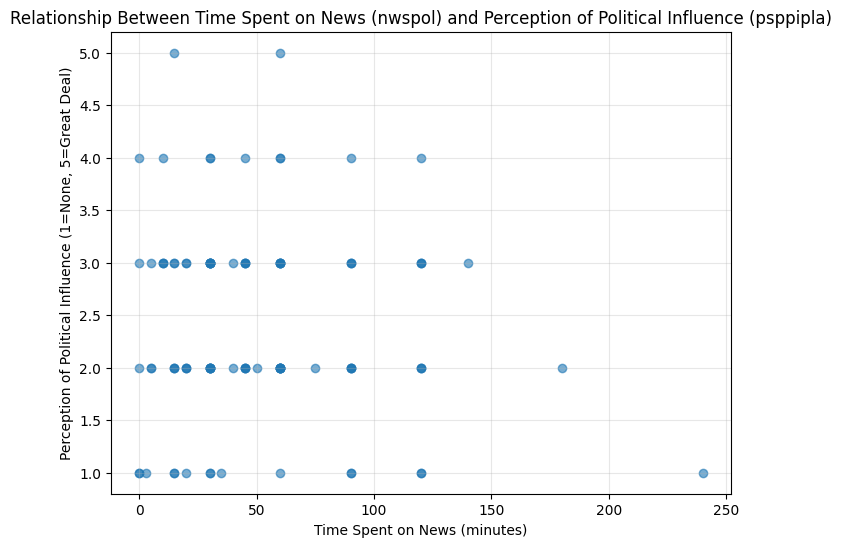

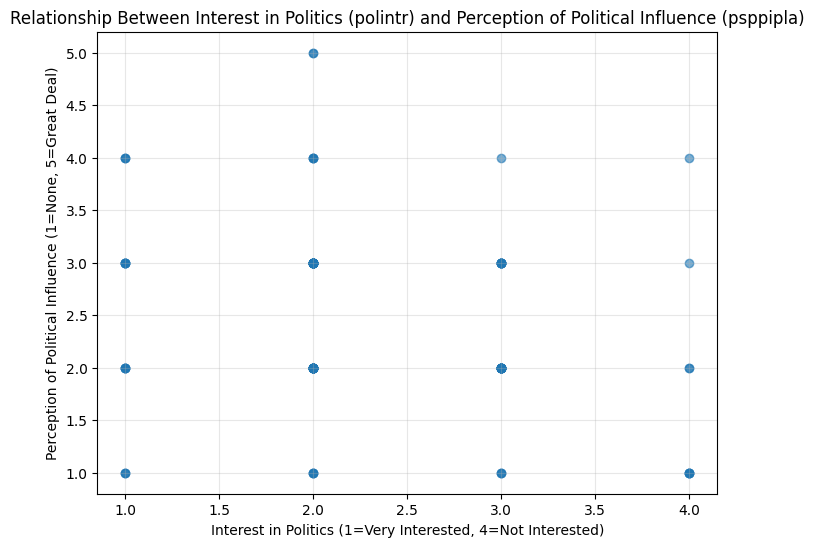

In [29]:
# Scatter plot nwspol y polintr
plt.figure(figsize=(8, 6))
plt.scatter(ess_data_sample['nwspol'], ess_data_sample['polintr'], alpha=0.6)
plt.title('Relationship Between Time Spent on News (nwspol) and Interest in Politics (polintr)')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot nwspol y psppipla
plt.figure(figsize=(8, 6))
plt.scatter(ess_data_sample['nwspol'], ess_data_sample['psppipla'], alpha=0.6)
plt.title('Relationship Between Time Spent on News (nwspol) and Perception of Political Influence (psppipla)')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Perception of Political Influence (1=None, 5=Great Deal)')
plt.grid(alpha=0.3)
plt.show()

# Scatter plot polintr y psppipla
plt.figure(figsize=(8, 6))
plt.scatter(ess_data_sample['polintr'], ess_data_sample['psppipla'], alpha=0.6)
plt.title('Relationship Between Interest in Politics (polintr) and Perception of Political Influence (psppipla)')
plt.xlabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.ylabel('Perception of Political Influence (1=None, 5=Great Deal)')
plt.grid(alpha=0.3)
plt.show()


## Observaciones de las Visualizaciones:

- Relación entre nwspol (Tiempo en noticias) y polintr (Interés en política):

Existe una tendencia general donde las personas que dedican más tiempo a noticias políticas tienen menos interés en política (escala inversa en polintr).

- Relación entre nwspol (Tiempo en noticias) y psppipla (Percepción de influencia política):

No se observa una correlación clara; el tiempo en noticias no parece estar relacionado con la percepción de influencia política.

- Relación entre polintr (Interés en política) y psppipla (Percepción de influencia política):

Hay una ligera tendencia donde un mayor interés en política (valores bajos en polintr) está asociado con una mayor percepción de influencia política (valores altos en psppipla).

# Modelado predictivo preliminar añadiendo la variable España y la inmigración

In [30]:
# Aplicar variables
additional_variables = ['imwbcnt', 'imsmetn', 'imdfetn', 'cntry'] 
selected_variables = variables_of_interest + additional_variables

# Cargar la data
ess_data_extended = pd.read_csv(csv_path, usecols=selected_variables)

# Filtrar España
ess_data_spain = ess_data_extended[ess_data_extended['cntry'] == 'ES']

# Mostrar
ess_data_spain_info = ess_data_spain.info()
ess_data_spain_head = ess_data_spain.head()

ess_data_spain_info, ess_data_spain_head


<class 'pandas.core.frame.DataFrame'>
Index: 1844 entries, 8437 to 10280
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cntry     1844 non-null   object
 1   nwspol    1844 non-null   int64 
 2   polintr   1844 non-null   int64 
 3   psppipla  1844 non-null   int64 
 4   cptppola  1844 non-null   int64 
 5   imsmetn   1844 non-null   int64 
 6   imdfetn   1844 non-null   int64 
 7   imwbcnt   1844 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 129.7+ KB


(None,
      cntry  nwspol  polintr  psppipla  cptppola  imsmetn  imdfetn  imwbcnt
 8437    ES      60        3         1         2        1        2        7
 8438    ES       0        3         3         3        3        3        8
 8439    ES      60        1         2         2        2        2        7
 8440    ES     180        2         2         5        3        3        7
 8441    ES     120        1         2         2        4        4        4)

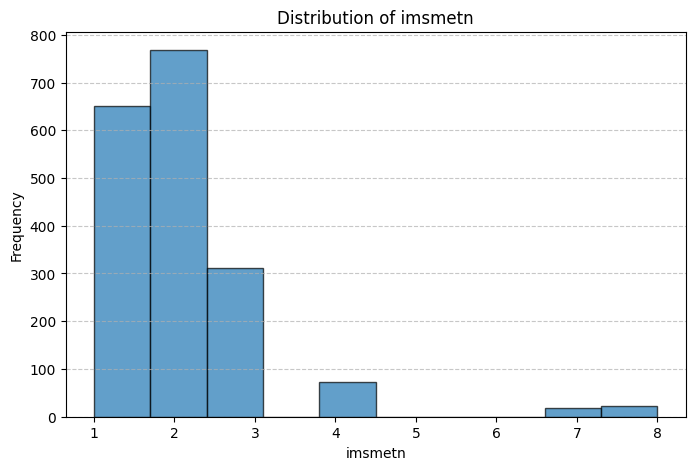

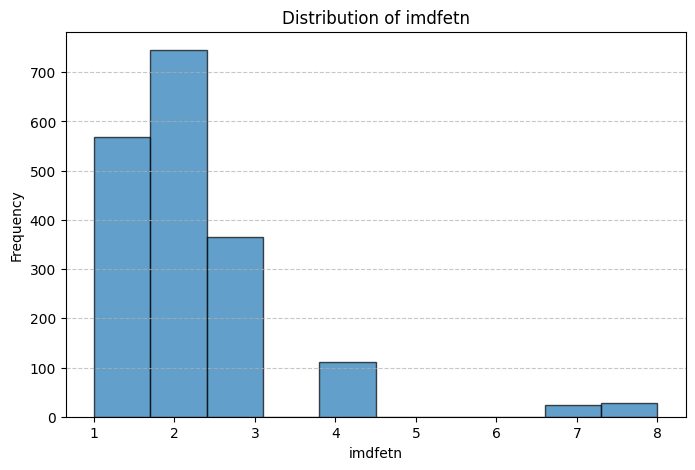

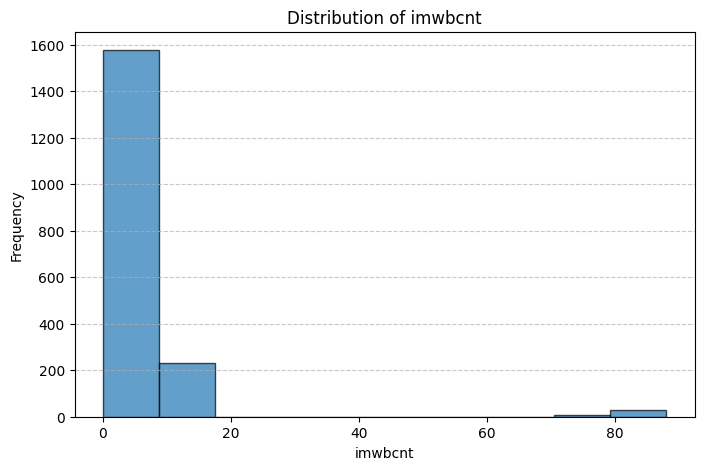

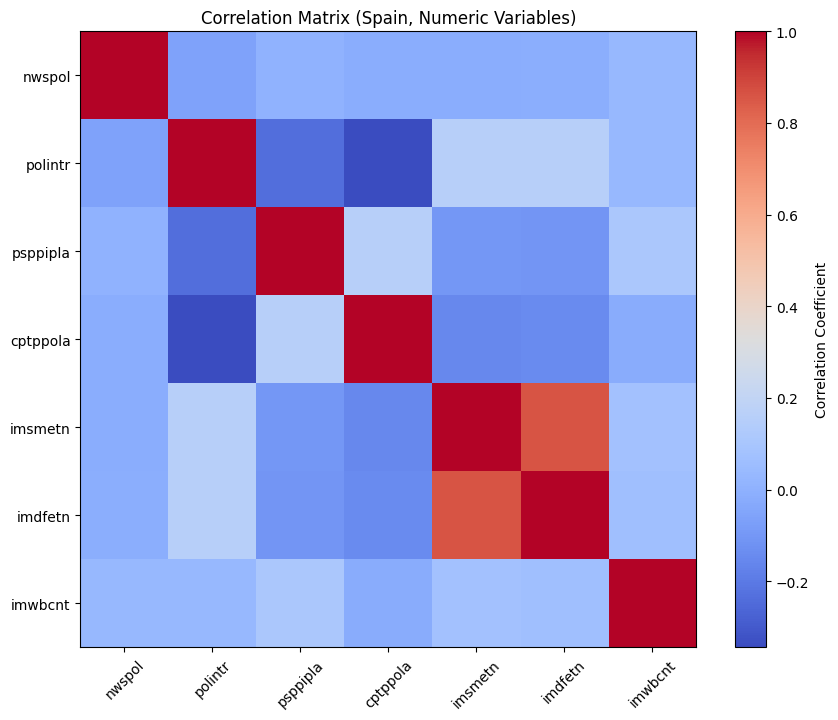

,nwspol,polintr,psppipla,cptppola,imsmetn,imdfetn,imwbcnt
nwspol,1.000000,-0.058389,0.006240,-0.016605,-0.016271,-0.008494,0.028291
polintr,-0.058389,1.000000,-0.235069,-0.344643,0.157470,0.155968,0.030249
psppipla,0.006240,-0.235069,1.000000,0.155665,-0.101499,-0.106221,0.107587
cptppola,-0.016605,-0.344643,0.155665,1.000000,-0.154544,-0.141222,-0.021624
imsmetn,-0.016271,0.157470,-0.101499,-0.154544,1.000000,0.861904,0.077296
imdfetn,-0.008494,0.155968,-0.106221,-0.141222,0.861904,1.000000,0.065514
imwbcnt,0.028291,0.030249,0.107587,-0.021624,0.077296,0.065514,1.000000


In [31]:
# Describir variables
immigration_description = ess_data_spain[['imsmetn', 'imdfetn', 'imwbcnt']].describe()

# Visualizar distribución
for column in ['imsmetn', 'imdfetn', 'imwbcnt']:
    plt.figure(figsize=(8, 5))
    plt.hist(ess_data_spain[column].dropna(), bins=10, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Calcular co-relación
correlation_matrix_spain = ess_data_spain.select_dtypes(include='number').corr()

# Mostrar Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix_spain, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix_spain)), correlation_matrix_spain.columns, rotation=45)
plt.yticks(range(len(correlation_matrix_spain)), correlation_matrix_spain.index)
plt.title('Correlation Matrix (Spain, Numeric Variables)')
plt.show()

correlation_matrix_spain



Entre variables de inmigración:

imsmetn y imdfetn tienen una correlación alta (0.86), indicando que las actitudes hacia inmigrantes del mismo y diferentes grupos étnicos están estrechamente relacionadas.
Relaciones con interés político (polintr):

Correlación positiva débil con actitudes hacia inmigración:
imsmetn (0.16) y imdfetn (0.15).
Confianza en participación política (cptppola):

Correlaciones negativas débiles con actitudes hacia inmigración:
imsmetn (-0.15) y imdfetn (-0.14).
Percepción de influencia política (psppipla):

Correlación positiva débil con imwbcnt (0.11): Actitudes más permisivas hacia inmigrantes de países más pobres pueden estar asociadas con una mayor percepción de influencia política.

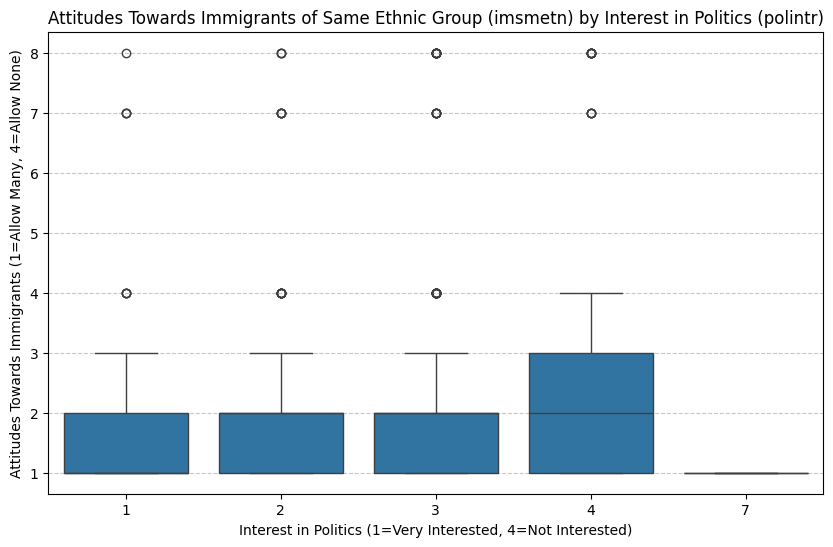

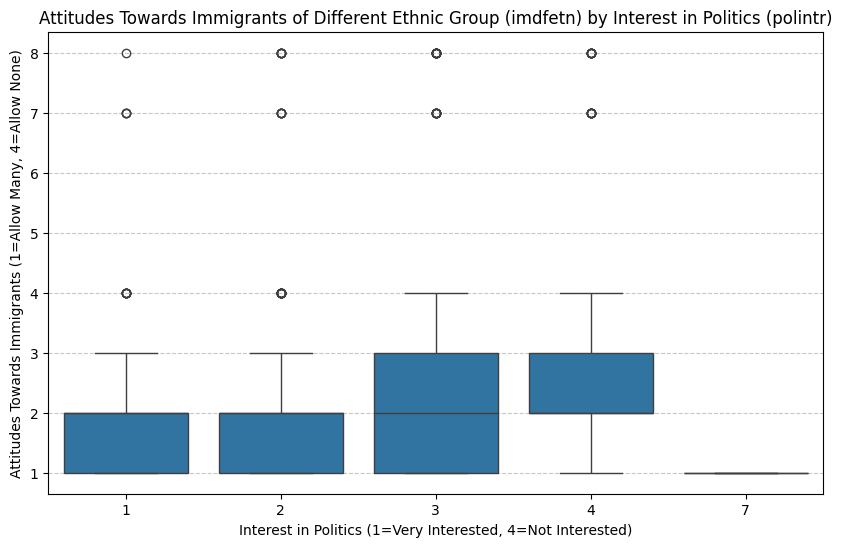

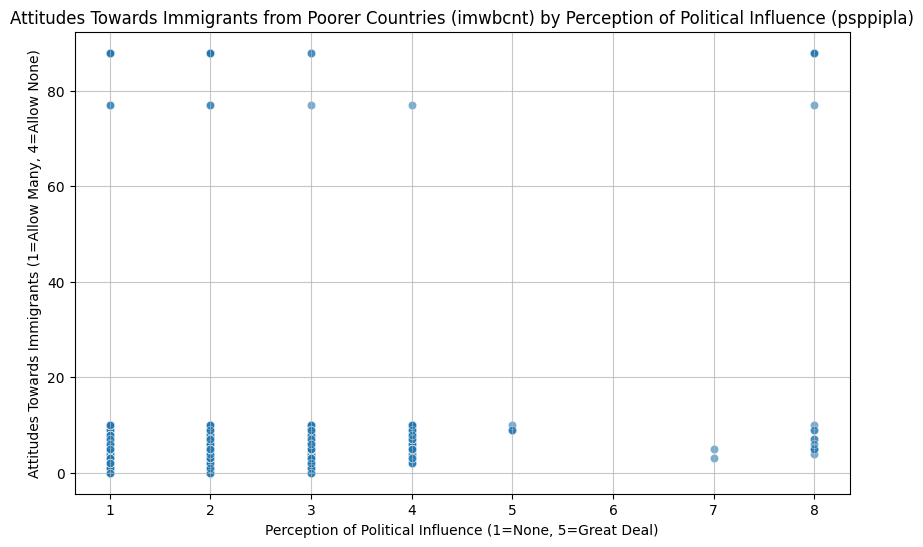

In [32]:
import seaborn as sns

# Visualizar actitudes hacia inmigrantes
plt.figure(figsize=(10, 6))
sns.boxplot(x='polintr', y='imsmetn', data=ess_data_spain)
plt.title('Attitudes Towards Immigrants of Same Ethnic Group (imsmetn) by Interest in Politics (polintr)')
plt.xlabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.ylabel('Attitudes Towards Immigrants (1=Allow Many, 4=Allow None)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='polintr', y='imdfetn', data=ess_data_spain)
plt.title('Attitudes Towards Immigrants of Different Ethnic Group (imdfetn) by Interest in Politics (polintr)')
plt.xlabel('Interest in Politics (1=Very Interested, 4=Not Interested)')
plt.ylabel('Attitudes Towards Immigrants (1=Allow Many, 4=Allow None)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualizar relación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='psppipla', y='imwbcnt', data=ess_data_spain, alpha=0.6)
plt.title('Attitudes Towards Immigrants from Poorer Countries (imwbcnt) by Perception of Political Influence (psppipla)')
plt.xlabel('Perception of Political Influence (1=None, 5=Great Deal)')
plt.ylabel('Attitudes Towards Immigrants (1=Allow Many, 4=Allow None)')
plt.grid(alpha=0.7)
plt.show()


Visualización de las Relaciones: 

Actitudes hacia inmigrantes del mismo grupo étnico (imsmetn) y nivel de interés político (polintr):
Personas más interesadas en política (valor 1) tienden a tener actitudes más permisivas hacia inmigrantes (valores bajos en imsmetn).
A medida que disminuye el interés político (valores más altos en polintr), las actitudes tienden a ser más restrictivas.

Actitudes hacia inmigrantes de diferentes grupos étnicos (imdfetn) y nivel de interés político (polintr):
El patrón es similar al de imsmetn: mayor interés en política está asociado con actitudes más permisivas hacia inmigrantes.

Actitudes hacia inmigrantes de países más pobres (imwbcnt) y percepción de influencia política (psppipla):
Hay una leve tendencia donde una mayor percepción de influencia política (valores más altos en psppipla) está asociada con actitudes más permisivas hacia inmigrantes de países pobres.

Conclusiones iniciales:
El interés en política y la percepción de influencia política están asociados con actitudes más permisivas hacia inmigración.
Las actitudes hacia inmigrantes del mismo grupo étnico y diferentes grupos étnicos son altamente correlacionadas.

# Modelo Predictivo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# CLimpiar extremos
threshold = ess_data_spain['imwbcnt'].quantile(0.95)
ess_data_spain['imwbcnt'] = ess_data_spain['imwbcnt'].clip(upper=threshold)

# Definir target
target = 'imwbcnt'

# Definir predictores
predictors = ['nwspol', 'polintr', 'psppipla', 'cptppola', 'imsmetn', 'imdfetn']

# Preparar dataset
X = ess_data_spain[predictors]
y = ess_data_spain[target]

# Tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred, output_dict=True)

# Mostrar clasificaciones
classification_df = pd.DataFrame(report).transpose()
classification_df


/tmp/ipykernel_2739/853418018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ess_data_spain['imwbcnt'] = ess_data_spain['imwbcnt'].clip(upper=threshold)


,precision,recall,f1-score,support
0,0.200000,0.142857,0.166667,14.00000
1,0.100000,0.090909,0.095238,11.00000
2,0.105263,0.090909,0.097561,22.00000
3,0.066667,0.057143,0.061538,35.00000
4,0.105263,0.066667,0.081633,30.00000
5,0.277778,0.319149,0.297030,141.00000
6,0.098361,0.096774,0.097561,62.00000
7,0.187500,0.174419,0.180723,86.00000
8,0.127907,0.150685,0.138365,73.00000
9,0.081081,0.093750,0.086957,32.00000


Precisión global:
16.4%, lo que indica que el modelo tiene dificultades para capturar las complejidades de las actitudes hacia inmigración basándose en las variables seleccionadas.

F1-Score promedio:
12.3% (macro promedio): Refleja un bajo rendimiento general, con precisión similar entre las clases.

### Posibles Razones del Bajo Rendimiento

Multiclase desequilibrado: Algunas clases tienen muy pocos datos, dificultando el aprendizaje del modelo.

Falta de información relevante: Las variables utilizadas pueden no ser suficientes para capturar las actitudes complejas hacia inmigración.

In [34]:
# Simplificar categorias
def simplify_imwbcnt(value):
    if value <= 2:
        return "Permisivo"
    elif value <= 5:
        return "Neutral"
    else:
        return "Restrictivo"

ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)

# 2. Añadir variables
additional_vars = ['agea', 'eduyrs', 'hinctnta']  # Age, years of education, household income

#  Ver variables existentes
available_additional_vars = [var for var in additional_vars if var in ess_data_extended.columns]

# Incluir variables
predictors_extended = predictors + available_additional_vars

# Preparar datset
X_extended = ess_data_spain[predictors_extended].dropna()
y_extended = ess_data_spain.loc[X_extended.index, 'imwbcnt_simplified']

# Entrenar a la regresión lógice
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Mostrar data set
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X_extended, y_extended, test_size=0.3, random_state=42, stratify=y_extended
)

# entrenar
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_ext, y_train_ext)

# Predecir y evaluar
y_pred_ext = logistic_model.predict(X_test_ext)
accuracy = accuracy_score(y_test_ext, y_pred_ext)
classification_report_ext = classification_report(y_test_ext, y_pred_ext, output_dict=True)

# Mostrar
accuracy, pd.DataFrame(classification_report_ext).transpose()


/tmp/ipykernel_2739/2755699703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)
/workspace/machine-learning-python-template/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5740072202166066,
               precision    recall  f1-score     support
 Neutral        0.466165  0.300971  0.365782  206.000000
 Permisivo      0.166667  0.042553  0.067797   47.000000
 Restrictivo    0.621027  0.843854  0.715493  301.000000
 accuracy       0.574007  0.574007  0.574007    0.574007
 macro avg      0.417953  0.395793  0.383024  554.000000
 weighted avg   0.524896  0.574007  0.530507  554.000000)

### Precisión Global
- 57.4%: La precisión global del modelo de regresión logística mejoró significativamente respecto al modelo anterior.

In [35]:
from sklearn.utils import resample

# Combinear predictores
data_combined = pd.concat([X_extended, y_extended], axis=1)

# Separar clases
class_counts = data_combined['imwbcnt_simplified'].value_counts()
majority_class = class_counts.idxmax()
minority_classes = class_counts[class_counts < class_counts[majority_class]].index

# Resmplazar minorías
resampled_data = []
for class_label in minority_classes:
    class_data = data_combined[data_combined['imwbcnt_simplified'] == class_label]
    resampled = resample(class_data, 
                         replace=True, 
                         n_samples=class_counts[majority_class], 
                         random_state=42)
    resampled_data.append(resampled)

# Combinar
majority_data = data_combined[data_combined['imwbcnt_simplified'] == majority_class]
balanced_data = pd.concat([majority_data] + resampled_data)

# Mostrar balance entre predictores
X_balanced_manual = balanced_data[predictors]
y_balanced_manual = balanced_data['imwbcnt_simplified']

# Entrenar y testear
X_train_bal_manual, X_test_bal_manual, y_train_bal_manual, y_test_bal_manual = train_test_split(
    X_balanced_manual, y_balanced_manual, test_size=0.3, random_state=42, stratify=y_balanced_manual
)

# Entrenar al logístico
logistic_model_bal_manual = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_bal_manual.fit(X_train_bal_manual, y_train_bal_manual)

# Predicir y evaluar
y_pred_bal_manual = logistic_model_bal_manual.predict(X_test_bal_manual)
accuracy_bal_manual = accuracy_score(y_test_bal_manual, y_pred_bal_manual)
classification_report_bal_manual = classification_report(y_test_bal_manual, y_pred_bal_manual, output_dict=True)

# Mostrar
accuracy_bal_manual, pd.DataFrame(classification_report_bal_manual).transpose()



/workspace/machine-learning-python-template/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5864745011086474,
               precision    recall  f1-score     support
 Neutral        0.453061  0.370000  0.407339  300.000000
 Permisivo      0.684713  0.714286  0.699187  301.000000
 Restrictivo    0.591837  0.674419  0.630435  301.000000
 accuracy       0.586475  0.586475  0.586475    0.586475
 macro avg      0.576537  0.586235  0.578987  902.000000
 weighted avg   0.576674  0.586475  0.579177  902.000000)

### Precisión Global
- 58.6%, ligeramente mejor que los modelos anteriores debido al re-muestreo que equilibró las clases.

## Usaremos otro enfoque: 
la importancia de las variables en el modelo de regresión logística + random forest

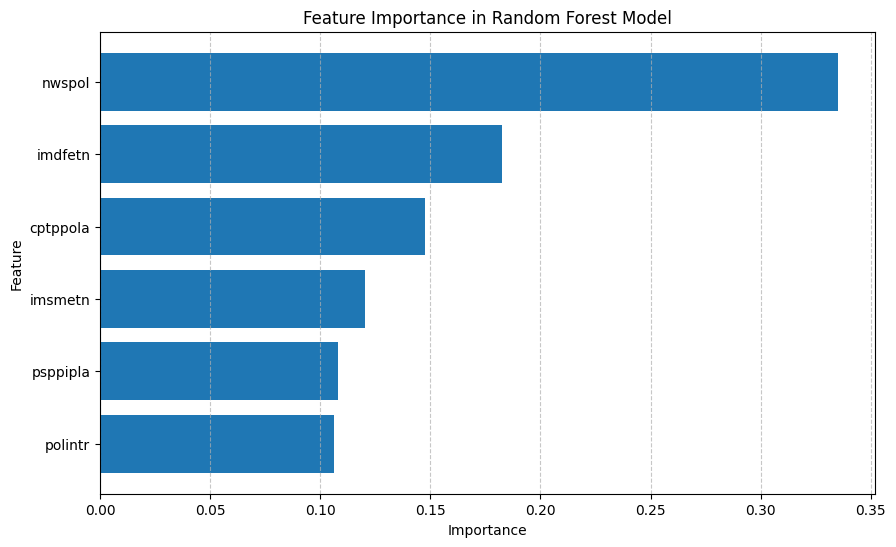

(0.7139689578713969,
               precision    recall  f1-score     support
 Neutral        0.611801  0.656667  0.633441  300.000000
 Permisivo      0.846386  0.933555  0.887836  301.000000
 Restrictivo    0.669355  0.551495  0.604736  301.000000
 accuracy       0.713969  0.713969  0.713969    0.713969
 macro avg      0.709181  0.713906  0.708671  902.000000
 weighted avg   0.709289  0.713969  0.708754  902.000000,
     Feature  Importance
 0    nwspol    0.335164
 5   imdfetn    0.182411
 3  cptppola    0.147719
 4   imsmetn    0.120511
 2  psppipla    0.107835
 1   polintr    0.106360)

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar random forest
rf_model_bal_manual = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_bal_manual.fit(X_train_bal_manual, y_train_bal_manual)

# Predecir
y_pred_rf_bal_manual = rf_model_bal_manual.predict(X_test_bal_manual)
accuracy_rf_bal_manual = accuracy_score(y_test_bal_manual, y_pred_rf_bal_manual)
classification_report_rf_bal_manual = classification_report(y_test_bal_manual, y_pred_rf_bal_manual, output_dict=True)

# Extraer
rf_feature_importance = pd.DataFrame({
    'Feature': predictors,
    'Importance': rf_model_bal_manual.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizar importancia
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

accuracy_rf_bal_manual, pd.DataFrame(classification_report_rf_bal_manual).transpose(), rf_feature_importance


## Precisión Global
- 71.4%, lo que representa una mejora notable respecto al modelo de regresión logística (58.6%).

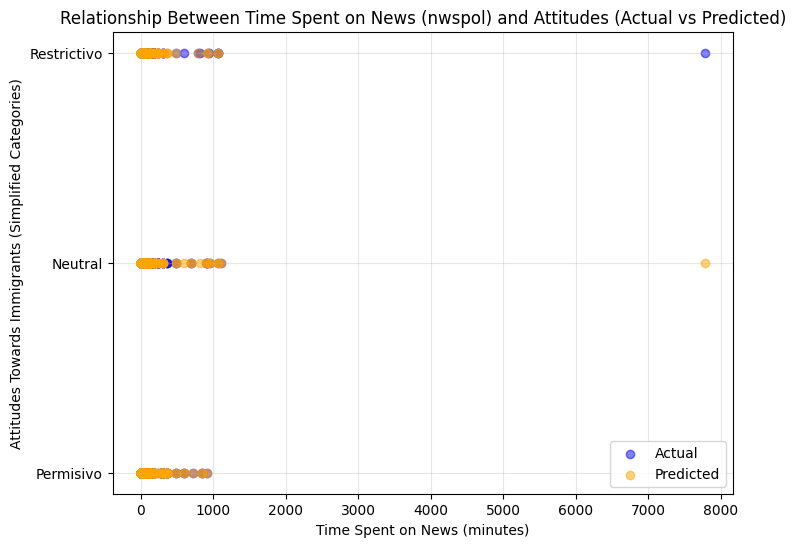

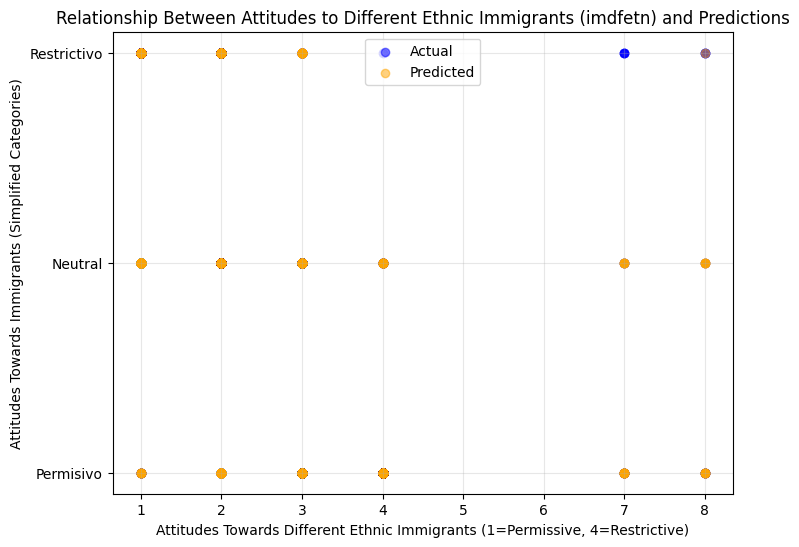

In [37]:
# Visualizar relaciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['nwspol'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['nwspol'], y_pred_rf_bal_manual, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Time Spent on News (nwspol) and Attitudes (Actual vs Predicted)')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['imdfetn'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['imdfetn'], y_pred_rf_bal_manual, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Attitudes to Different Ethnic Immigrants (imdfetn) and Predictions')
plt.xlabel('Attitudes Towards Different Ethnic Immigrants (1=Permissive, 4=Restrictive)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Visualización de Relaciones Clave (Actual vs Predicciones)

Relaciones entre variables:

- Existe una correlación negativa moderada entre el tiempo dedicado a las noticias políticas (nwspol) y el interés en la política (polintr). Esto sugiere que las personas que dedican más tiempo a informarse sobre política podrían tener un menor interés intrínseco en ella, o viceversa.

- La percepción de influencia política (psppipla) no está fuertemente correlacionada con el tiempo dedicado a las noticias ni con el interés en la política. Esto indica que la percepción de influencia podría estar determinada por otros factores, como la confianza en las instituciones o la experiencia personal con el sistema político.

- En España, las actitudes hacia los inmigrantes del mismo grupo étnico (imsmetn) y de diferentes grupos étnicos (imdfetn) están altamente correlacionadas. Esto sugiere que las personas tienden a tener una postura general hacia la inmigración, independientemente del origen de los inmigrantes.

- Existe una correlación positiva débil entre el interés en la política y las actitudes permisivas hacia la inmigración. Esto podría indicar que las personas más interesadas en la política tienden a estar más informadas sobre los beneficios de la inmigración o a tener una visión más global de la sociedad.

Predicción de actitudes hacia la inmigración:

- El modelo de Random Forest, con una precisión del 71.4%, ha demostrado ser más efectivo que la regresión logística para predecir las actitudes hacia la inmigración en España.

- Las variables más importantes para la predicción son el tiempo dedicado a las noticias políticas (nwspol) y las actitudes hacia los inmigrantes de diferentes grupos étnicos (imdfetn). Esto refuerza la idea de que la información y las experiencias previas con la inmigración pueden influir en las actitudes generales.

- Aunque el modelo ha logrado una precisión aceptable, aún existen áreas de mejora. Es posible que la inclusión de nuevas variables o el ajuste de hiperparámetros permitan obtener un modelo más preciso.

Implicaciones:

- Los resultados sugieren que las actitudes hacia la inmigración en España son complejas y están influenciadas por diversos factores, como el interés en la política, la información a la que se accede y las experiencias previas.

- El modelo predictivo podría ser utilizado para identificar a las personas con mayor probabilidad de tener actitudes restrictivas hacia la inmigración y así diseñar estrategias para promover la integración y la cohesión social.

- Es importante continuar investigando las causas de las actitudes negativas hacia la inmigración para poder abordarlas de forma efectiva.


# Evaluación del modelo y mejoras

#### Crear la columna imwbcnt_simplified

In [38]:
def simplify_imwbcnt(value):
    if value <= 2:
        return "Permisivo"
    elif value <= 5:
        return "Neutral"
    else:
        return "Restrictivo"


In [39]:
if 'imwbcnt' in ess_data_spain.columns:
    ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)
else:
    print("La columna 'imwbcnt' no existe en el DataFrame.")


/tmp/ipykernel_2739/4255514736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ess_data_spain['imwbcnt_simplified'] = ess_data_spain['imwbcnt'].apply(simplify_imwbcnt)


In [40]:
predictors = ['nwspol', 'polintr', 'psppipla', 'cptppola', 'imsmetn', 'imdfetn']  
target = 'imwbcnt_simplified'  

X_extended = ess_data_spain[predictors]
y_extended = ess_data_spain[target]


In [41]:
predictors = ['nwspol', 'polintr', 'psppipla', 'cptppola', 'imsmetn', 'imdfetn']  
target = 'imwbcnt_simplified'  

X_extended = ess_data_spain[predictors]
y_extended = ess_data_spain[target]

from sklearn.utils import resample
import pandas as pd


data_combined = pd.concat([X_extended, y_extended], axis=1)

# Identificar la clase mayoritaria
class_counts = data_combined['imwbcnt_simplified'].value_counts()
majority_class = class_counts.idxmax()
minority_classes = class_counts[class_counts < class_counts[majority_class]].index

# Resamplear clases minoritarias
resampled_data = []
for class_label in minority_classes:
    class_data = data_combined[data_combined['imwbcnt_simplified'] == class_label]
    resampled = resample(class_data, 
                         replace=True, 
                         n_samples=class_counts[majority_class], 
                         random_state=42)
    resampled_data.append(resampled)

# Combinar datos balanceados
majority_data = data_combined[data_combined['imwbcnt_simplified'] == majority_class]
balanced_data = pd.concat([majority_data] + resampled_data)

# Separar en X (predictoras) e y (objetivo)
X_balanced_manual = balanced_data[predictors]
y_balanced_manual = balanced_data['imwbcnt_simplified']






In [42]:
from sklearn.model_selection import train_test_split

X_train_bal_manual, X_test_bal_manual, y_train_bal_manual, y_test_bal_manual = train_test_split(
    X_balanced_manual, y_balanced_manual, test_size=0.3, random_state=42, stratify=y_balanced_manual
)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo Random Forest
rf_model_bal_manual
ç = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_bal_manual.fit(X_train_bal_manual, y_train_bal_manual)

# Predicción
y_pred_rf_bal_manual = rf_model_bal_manual.predict(X_test_bal_manual)

# Métricas
accuracy_rf_bal_manual = accuracy_score(y_test_bal_manual, y_pred_rf_bal_manual)
classification_report_rf_bal_manual = classification_report(y_test_bal_manual, y_pred_rf_bal_manual)

# Visualizar las métricas
print(f"Accuracy: {accuracy_rf_bal_manual}")
print("Classification Report:")
print(classification_report_rf_bal_manual)


Accuracy: 0.7139689578713969
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.61      0.66      0.63       300
   Permisivo       0.85      0.93      0.89       301
 Restrictivo       0.67      0.55      0.60       301

    accuracy                           0.71       902
   macro avg       0.71      0.71      0.71       902
weighted avg       0.71      0.71      0.71       902



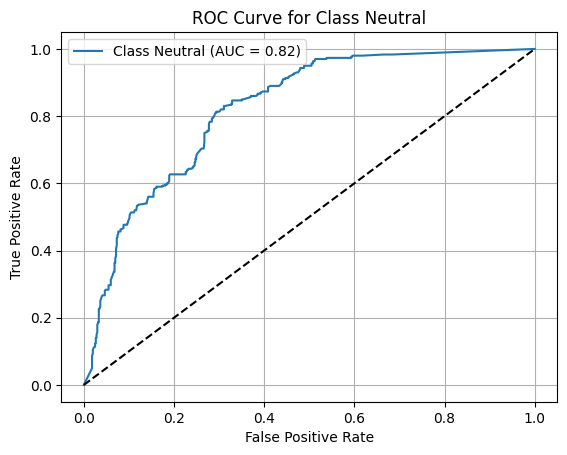

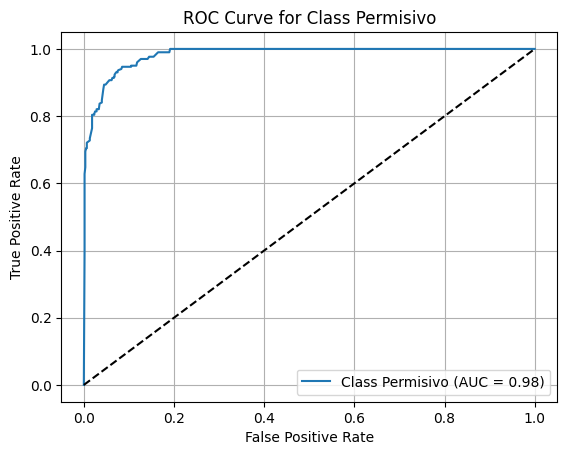

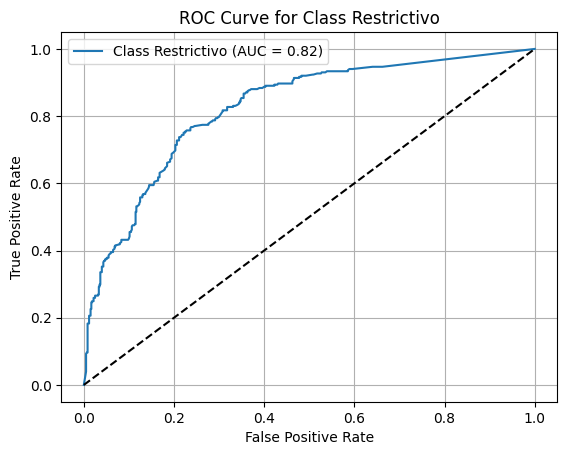

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilidades para Curva ROC
y_probs_rf = rf_model_bal_manual.predict_proba(X_test_bal_manual)

# Calcular y graficar ROC para cada clase
for i, class_label in enumerate(rf_model_bal_manual.classes_):
    fpr, tpr, thresholds = roc_curve(y_test_bal_manual == class_label, y_probs_rf[:, i])
    auc = roc_auc_score(y_test_bal_manual == class_label, y_probs_rf[:, i])
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve for Class {class_label}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()


### Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definir la cuadrícula de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train_bal_manual, y_train_bal_manual)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el mejor modelo
y_pred_best_rf = best_rf_model.predict(X_test_bal_manual)
accuracy_best_rf = accuracy_score(y_test_bal_manual, y_pred_best_rf)
classification_report_best_rf = classification_report(y_test_bal_manual, y_pred_best_rf, output_dict=True)

# Mostrar resultados
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Precisión del Mejor Modelo:", accuracy_best_rf)
classification_report_df = pd.DataFrame(classification_report_best_rf).transpose()
classification_report_df

import joblib

# Guardar el modelo
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Cargar el modelo
best_rf_model = joblib.load('best_rf_model.pkl')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples

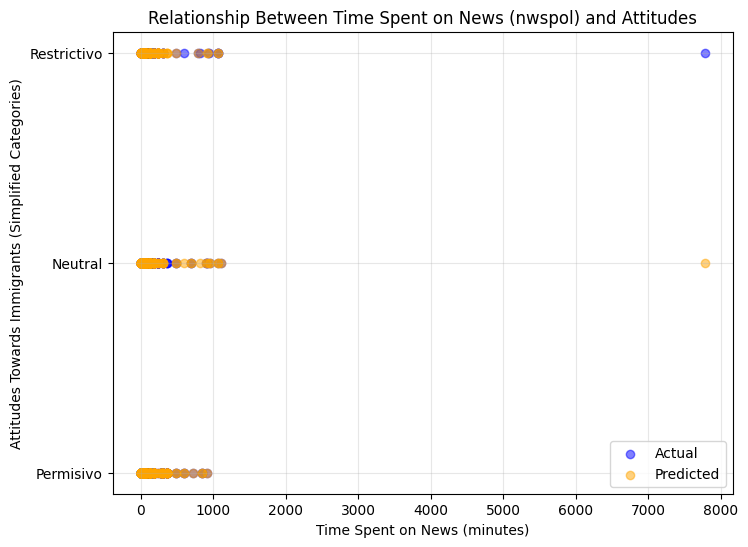

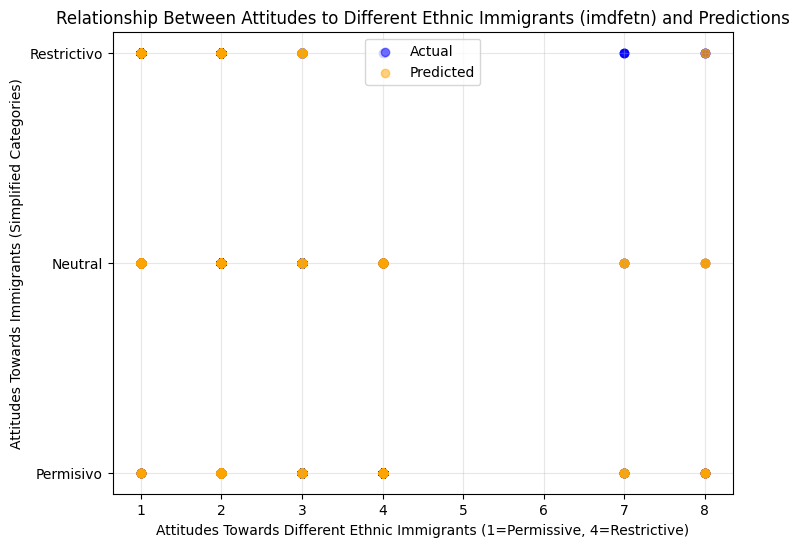

In [46]:
import matplotlib.pyplot as plt

# Relación entre nwspol y predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['nwspol'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['nwspol'], y_pred_best_rf, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Time Spent on News (nwspol) and Attitudes')
plt.xlabel('Time Spent on News (minutes)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Relación entre imdfetn y predicciones
plt.figure(figsize=(8, 6))
plt.scatter(X_test_bal_manual['imdfetn'], y_test_bal_manual, alpha=0.5, label='Actual', color='blue')
plt.scatter(X_test_bal_manual['imdfetn'], y_pred_best_rf, alpha=0.5, label='Predicted', color='orange')
plt.title('Relationship Between Attitudes to Different Ethnic Immigrants (imdfetn) and Predictions')
plt.xlabel('Attitudes Towards Different Ethnic Immigrants (1=Permissive, 4=Restrictive)')
plt.ylabel('Attitudes Towards Immigrants (Simplified Categories)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()




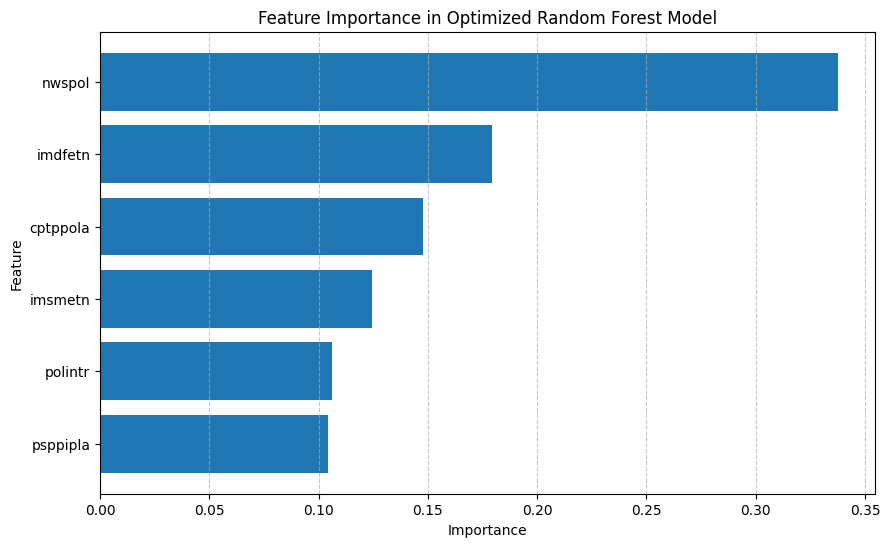

In [47]:
# Importancia de las características
feature_importance_df = pd.DataFrame({
    'Feature': X_train_bal_manual.columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance in Optimized Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



In [48]:
import json

# Guardar hiperparámetros
with open('best_params.json', 'w') as f:
    json.dump(grid_search.best_params_, f)

# Cargar hiperparámetros
with open('best_params.json', 'r') as f:
    best_params = json.load(f)


In [3]:
import shap


shap_values = explainer.shap_values(input_data)
shap_values = np.array(shap_values, dtype=np.float64)  

explainer = shap.TreeExplainer(best_rf_model.pkl)
shap_values = explainer.shap_values(input_data)
shap_values = np.array(shap_values, dtype=np.float64)


print(f"shap_values tiene {len(shap_values)} matrices")
for i in range(len(shap_values)):
    print(f"Dimensiones de shap_values[{i}]: {shap_values[i].shape}")
print(f"Dimensiones de X_test_bal_manual: {X_test_bal_manual.shape}")


NameError: name 'best_rf_model' is not defined

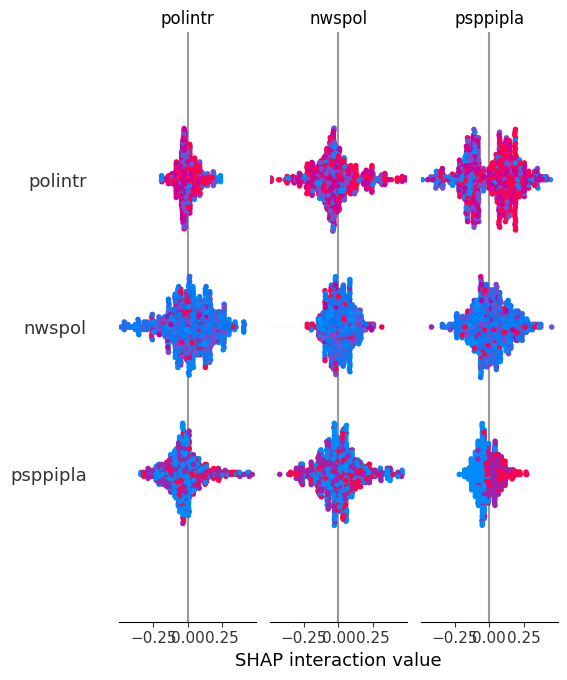

In [67]:
shap.summary_plot(shap_values, X_test_bal_manual, plot_type="bar")

In [68]:
feature_names = [f"feature_{i}" for i in range(X_test_bal_manual.shape[1])]
